In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords,wordnet
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Read dataset

In [ ]:
df = pd.read_json(open("data_503986.json", "r", encoding="utf8"))
df.shape


(693, 2)

In [ ]:
df.tail()


,id,text
688,1615836342079954960,@DylanLeClair_ @elonmusk @joshhzimmer @stats_f...
689,1615836341660524564,"#pollen, #flu, #COVID19 They all look simila..."
690,1615836340758904832,You people need to calm the fck down with the ...
691,1615836340490313759,@elonmusk I would love to know who voted yes o...
692,1615836339412553730,@elonmusk @alx Do you think that may have come...


In [ ]:
df.shape

(693, 2)

Data Wrangling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      693 non-null    int64 
 1   text    693 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.0+ KB


In [ ]:
df.isnull().sum()

id      0
text    0
dtype: int64

Dropping coulmns with most of the Null values

Let's view the date the tweets have been made

Text Preprocessing

In [ ]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have",
"rt":"",
"RT":"",
"http":"",
"https":""
}

def lookup_dict(text, dictionary):
    for word in str(text).split():
        if word.lower() in dictionary:
            if word.lower() in str(text).split():
                text = text.replace(word, dictionary[word.lower()])
    return text

df['tweet'] = df['text'].apply(lambda x: lookup_dict(x,apostrophe_dict))

In [ ]:
df.head()

,id,text,tweet
0,1605746103210479616,@FurioGiunta10 @Reuters . @elonmusk \n\nWhy do...,@FurioGiunta10 @Reuters . @elonmusk \n\nWhy do...
1,1605746103093059585,@elonmusk Help spread Putin propaganda for Tes...,@elonmusk Help spread Putin propaganda for Tes...
2,1605746103030542336,@POTUS *What the Soul of USA is: Shit in its U...,@POTUS *What the Soul of USA is: Shit in its U...
3,1605746103025954816,@elonmusk Where's the $Doge quote?,@elonmusk Where's the $Doge quote?
4,1605746102820552704,@elonmusk @SenSchumer @LeaderMcConnell Liberal...,@elonmusk @SenSchumer @LeaderMcConnell Liberal...


In [ ]:
# Creating token for the clean tweets
df['tweet'] =df['tweet'].apply(lambda x: word_tokenize(str(x)))

#remove stop words
stop_words = set(stopwords.words('english'))
# Created new columns of tokens - where stop words are being removed
df['tweet'] = df['tweet'].apply(lambda x: [word for word in x if not word in stop_words])
## Tokens columns with stop words and without stop words


In [ ]:
#calculating sentiments
from textblob import TextBlob
def GetTextSubjectivity(txt):
    txt=str(txt)
    return TextBlob(txt).sentiment.subjectivity

def GetTextPolarity(txt):
    txt=str(txt)
    return TextBlob(txt).sentiment.polarity

df['Subjectivity'] = df['tweet'].apply(GetTextSubjectivity)
df['Polarity'] = df['tweet'].apply(GetTextPolarity)

def GetTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"

df["Score"]=df['Polarity'].apply(GetTextAnalysis)

In [ ]:
dt = df[['text','Score','Polarity']].copy()

In [ ]:
df.head()

,id,text,tweet,Subjectivity,Polarity,Score
0,1605746103210479616,@FurioGiunta10 @Reuters . @elonmusk \n\nWhy do...,"[@, FurioGiunta10, @, Reuters, ., @, elonmusk,...",0.0,0.0,Neutral
1,1605746103093059585,@elonmusk Help spread Putin propaganda for Tes...,"[@, elonmusk, Help, spread, Putin, propaganda,...",0.1,-0.1,Negative
2,1605746103030542336,@POTUS *What the Soul of USA is: Shit in its U...,"[@, POTUS, *, What, Soul, USA, :, Shit, USA, T...",0.8,-0.2,Negative
3,1605746103025954816,@elonmusk Where's the $Doge quote?,"[@, elonmusk, Where, 's, $, Doge, quote, ?]",0.0,0.0,Neutral
4,1605746102820552704,@elonmusk @SenSchumer @LeaderMcConnell Liberal...,"[@, elonmusk, @, SenSchumer, @, LeaderMcConnel...",0.0,0.0,Neutral


In [ ]:
def cleaning(text):
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = str(text)
    text = text.lower()
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    # removing the emojies
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text

dt['text'] = df['tweet'].apply(cleaning)

In [ ]:
dt.head()

,text,Score,Polarity
0,furiogiunta10 reuters elonmusk associate finan...,Neutral,0.0
1,elonmusk help spread putin propaganda tesla ht...,Negative,-0.1
2,potus soul usa shit usa thieves administration...,Negative,-0.2
3,elonmusk doge quote,Neutral,0.0
4,elonmusk senschumer leadermcconnell liberals i...,Neutral,0.0


In [ ]:
from PIL import Image
# Initialize Lemmatize
wordnet_lem = WordNetLemmatizer()

# Lemmatize processed text and join everything in a list
df['text_lem'] = df['text'].apply(wordnet_lem.lemmatize)
all_words_lem = ' '.join([word for word in df['text_lem']])

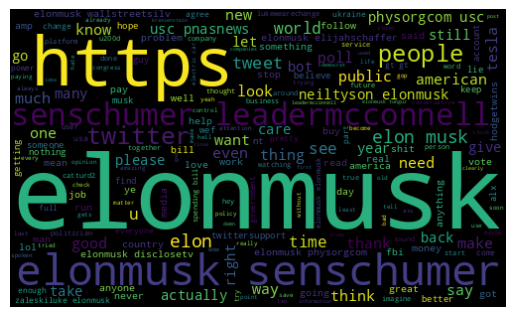

In [ ]:
allwords = ' '.join([twts for twts in dt['text']])
wordcloud = WordCloud(width = 500 , height=300,random_state = 21, max_font_size=119).generate(allwords)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Getting sentiments of the tweets using TextBlob

In [ ]:

sorted = dt.sort_values(by=['Polarity'])
sorted.head()


,text,Score,Polarity
571,rahilasheikh7 theboschfawstin jihadwatchrs elo...,Negative,-1.000
468,elonmusk senschumer leadermcconnell senatorrom...,Negative,-1.000
178,elonmusk senschumer leadermcconnell elon pathetic,Negative,-1.000
488,kapitaenz elonmusk byronyork ap russia wont ta...,Negative,-0.900
542,elonmusk physorgcom usc pnasnews iranians walk...,Negative,-0.875


In [ ]:
sortedN = dt.sort_values(by = ['Polarity'], ascending = False)
sortedN.head()

,text,Score,Polarity
307,americantribela elonmusk looks like great time...,Positive,1.0
236,need happy tweet elonmusk,Positive,1.0
145,denigo bessbell twitter elonmusk spewed handfu...,Positive,1.0
635,iz got best https tcokwrultuwli,Positive,1.0
675,kmacmusic elonmusk elon musk something incredi...,Positive,0.9


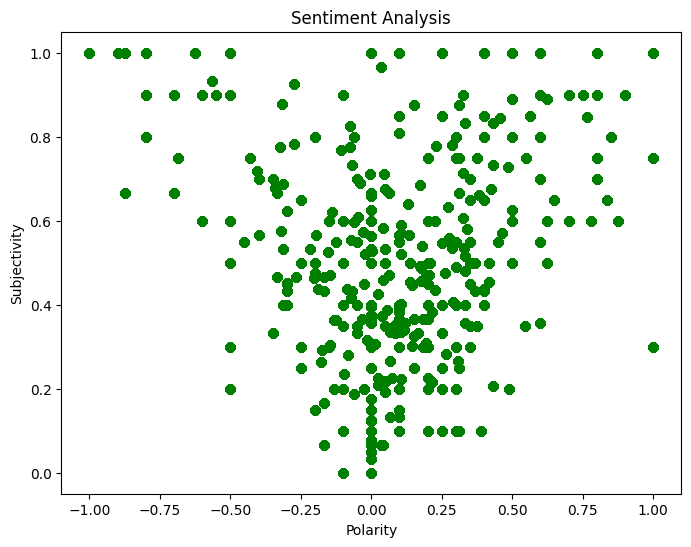

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, dt.shape[0]):
  plt.scatter(dt['Polarity'], df['Subjectivity'], color = 'Green')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
positive=df[df['Score']=='Positive']
print (str(round(positive.shape[0]/(df.shape[0])*100)) + "% Positive tweets")
pos = positive.shape[0]/(df.shape[0])*100

negative=df[df['Score']=='Negative']
print (str(round(negative.shape[0]/(df.shape[0])*100)) + "% Negative tweets")
neg = negative.shape[0]/df.shape[0]*100

neutral=df[df['Score']=='Neutral']
print (str(round((neutral.shape[0])/(df.shape[0])*100)) + "% neutral tweets")
neu = neutral.shape[0]/df.shape[0]*100

39% Positive tweets
18% Negative tweets
43% neutral tweets


(-1.1008379782381243, 1.117620126100689, -1.1023459724579097, 1.14944771317901)

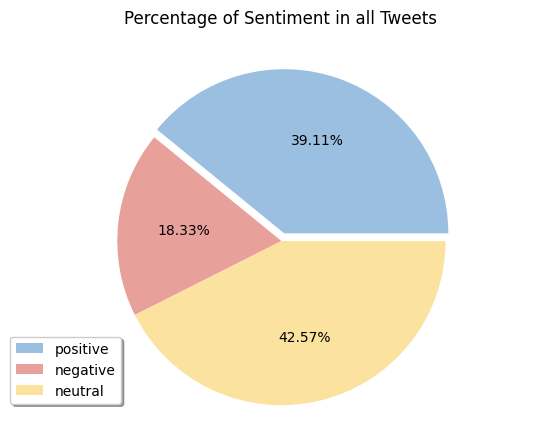

In [ ]:
#viewing % posi , neg , neu tweets
explode=(0.05,0,0)
labels = 'positive','negative','neutral'
sizes = [pos,neg,neu]
colours=['#9BBFE0','#E8A09A','#FBE29F']
plt.pie(sizes,explode=explode,colors=colours,autopct='%.2f%%',startangle=0)
plt.title('Percentage of Sentiment in all Tweets \n', fontsize=12)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')

<Axes: title={'center': 'Sentiment Analysis'}, xlabel='Sentiment', ylabel='Counts'>

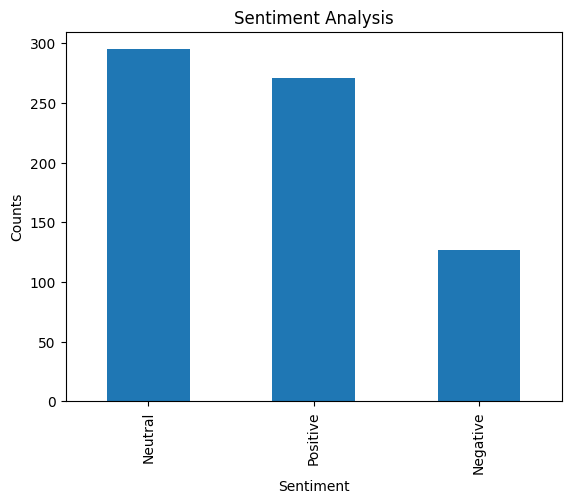

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dt['Score'].value_counts().plot(kind='bar')